<a href="https://colab.research.google.com/github/LuxinZhang902/Machine_Learning/blob/main/RNN_Predict_for_Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
#Load the data 
from google.colab import files
uploaded = files.upload()


Saving NFLX.csv to NFLX.csv


In [ ]:
df = pd.read_csv('NFLX.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-28,419.989990,421.000000,402.910004,403.829987,403.829987,10101200
1,2020-04-29,399.529999,415.859985,393.600006,411.890015,411.890015,9693100
2,2020-04-30,410.309998,424.440002,408.000000,419.850006,419.850006,7954000
3,2020-05-01,415.100006,427.970001,411.730011,415.269989,415.269989,8299900
4,2020-05-04,417.779999,428.540009,414.869995,428.149994,428.149994,7799100
5,2020-05-05,427.559998,431.000000,421.559998,424.679993,424.679993,6286300


In [ ]:
#Get the number of trading days
df.shape

(252, 7)

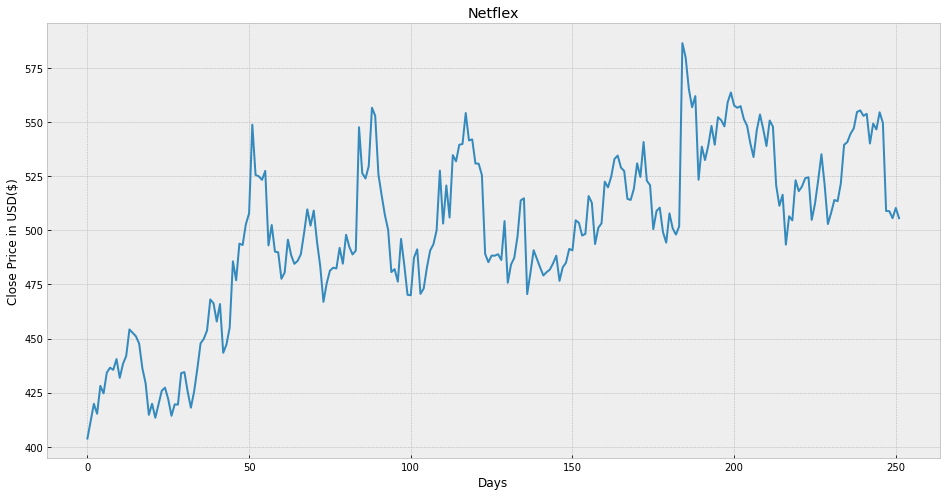

In [ ]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Netflex')
plt.xlabel('Days')
plt.ylabel('Close Price in USD($)')
plt.plot(df['Close'])
plt.show()

In [ ]:
#Get the close price
df = df[['Close']]
df.head(4)

,Close
0,403.829987
1,411.890015
2,419.850006
3,415.269989


In [ ]:
#Create a variable to predit 'x' days out into the future
future_days = 35
#Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
248,508.779999,NaN
249,505.549988,NaN
250,510.299988,NaN
251,505.549988,NaN


In [ ]:
#Create the feature data set (X) and convert it to a numpy array 
#and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)


[[403.829987]
 [411.890015]
 [419.850006]
 [415.269989]
 [428.149994]
 [424.679993]
 [434.26001 ]
 [436.529999]
 [435.549988]
 [440.519989]
 [431.820007]
 [438.269989]
 [441.950012]
 [454.190002]
 [452.579987]
 [451.040009]
 [447.670013]
 [436.25    ]
 [429.320007]
 [414.769989]
 [419.890015]
 [413.440002]
 [419.730011]
 [425.920013]
 [427.309998]
 [421.970001]
 [414.329987]
 [419.600006]
 [419.48999 ]
 [434.049988]
 [434.480011]
 [425.559998]
 [418.070007]
 [425.5     ]
 [436.130005]
 [447.769989]
 [449.869995]
 [453.720001]
 [468.040009]
 [466.26001 ]
 [457.850006]
 [465.910004]
 [443.399994]
 [447.23999 ]
 [455.040009]
 [485.640015]
 [476.890015]
 [493.809998]
 [493.160004]
 [502.779999]
 [507.76001 ]
 [548.72998 ]
 [525.5     ]
 [524.880005]
 [523.26001 ]
 [527.390015]
 [492.98999 ]
 [502.410004]
 [490.100006]
 [489.820007]
 [477.579987]
 [480.450012]
 [495.649994]
 [488.51001 ]
 [484.480011]
 [485.799988]
 [488.880005]
 [498.619995]
 [509.640015]
 [502.109985]
 [509.079987]
 [494.

In [ ]:
#Create the target data set(y) and convert it to a numpy array and get
#all of the target values except the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[447.769989 449.869995 453.720001 468.040009 466.26001  457.850006
 465.910004 443.399994 447.23999  455.040009 485.640015 476.890015
 493.809998 493.160004 502.779999 507.76001  548.72998  525.5
 524.880005 523.26001  527.390015 492.98999  502.410004 490.100006
 489.820007 477.579987 480.450012 495.649994 488.51001  484.480011
 485.799988 488.880005 498.619995 509.640015 502.109985 509.079987
 494.730011 483.380005 466.929993 475.470001 481.329987 482.679993
 482.350006 491.869995 484.529999 497.899994 492.309998 488.809998
 490.579987 547.530029 526.27002  523.890015 529.559998 556.549988
 552.840027 525.75     516.049988 507.019989 500.190002 480.670013
 482.029999 476.26001  495.98999  483.859985 470.200012 469.959991
 487.350006 491.170013 470.609985 473.079987 482.880005 490.649994
 493.480011 500.029999 527.51001  503.059998 520.650024 505.869995
 534.659973 531.789978 539.440002 539.809998 554.090027 541.450012
 541.940002 530.789978 530.719971 525.419983 489.049988 485.230011


In [ ]:
#Split the data into 75% training and 25% testing
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size = 0.25)

In [ ]:
#Creat the models
#Creat the decisino tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)


In [ ]:
#Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[497.980011],
       [501.769989],
       [586.340027],
       [579.840027],
       [565.169983],
       [556.780029],
       [561.929993],
       [523.280029],
       [538.599976],
       [532.390015],
       [539.039978],
       [548.159973],
       [539.450012],
       [552.159973],
       [550.789978],
       [547.919983],
       [559.070007],
       [563.590027],
       [557.590027],
       [556.52002 ],
       [557.280029],
       [551.340027],
       [548.219971],
       [540.219971],
       [533.780029],
       [546.150024],
       [553.409973],
       [546.700012],
       [538.849976],
       [550.640015],
       [547.820007],
       [520.700012],
       [511.290009],
       [516.390015],
       [493.329987]])

In [ ]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[506.440002 504.540009 518.02002  518.02002  520.25     524.030029
 524.440002 504.790009 512.179993 523.109985 535.090027 520.809998
 490.700012 485.230011 549.570007 513.390015 521.659973 520.25
 540.669983 544.530029 546.98999  554.580017 555.309998 552.780029
 563.590027 540.02002  549.219971 546.539978 554.440002 549.570007
 513.390015 508.779999 505.549988 488.23999  505.549988]

[511.73126832 513.08769936 543.3552695  541.02892307 535.77852238
 532.77576245 534.61893174 520.78613086 526.26913147 524.04658984
 526.42660795 529.69064915 526.57335889 531.12224695 530.63192649
 529.60475686 533.59534432 535.213057   533.06566029 532.68270537
 532.95471218 530.82878873 529.7121224  526.84892679 524.54407509
 528.9712895  531.56962126 529.16812991 526.35860634 530.57825482
 529.5689755  519.86274419 516.49490929 518.32019864 510.06702728]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


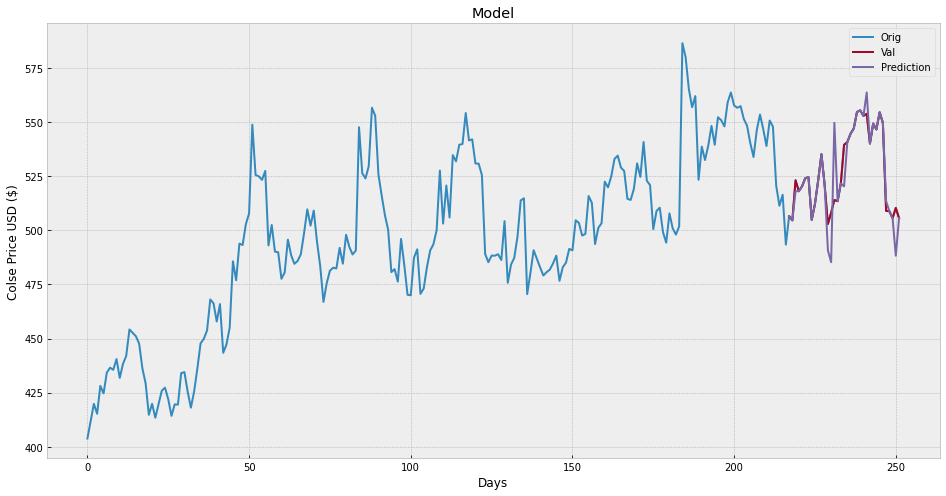

In [ ]:
#Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Colse Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Prediction'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


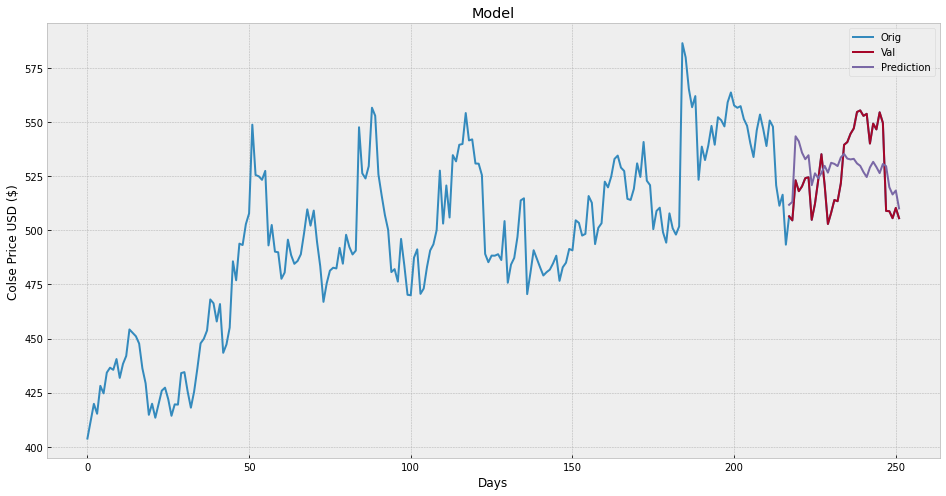

In [ ]:
#Visualize the data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Colse Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Prediction'])
plt.show()

In [ ]:
#Refernece to the video: https://www.youtube.com/watch?v=hOLSGMEEwlI